We begin with a simple base case:

\begin{align}
&Ax \approx b \\
&A \in \mathbb{R}^{m \times n}\\
&b \in \mathbb{R}^m
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

With nice, well-behaved matrices we'd have something like this

In [14]:
A = np.array([[1,2,1],[3,2,3],[4,1,1]])
y = np.linalg.inv(x)
b = np.array([6,8,9]).transpose()
print(A)
print(y)
print(b)
X = np.dot(y,b)
np.dot(A,X)

[[1 2 1]
 [3 2 3]
 [4 1 1]]
[[-8.33333333e-02 -8.33333333e-02  3.33333333e-01]
 [ 7.50000000e-01 -2.50000000e-01 -7.93016446e-18]
 [-4.16666667e-01  5.83333333e-01 -3.33333333e-01]]
[6 8 9]


array([6., 8., 9.])

Nonetheless, our objective remains the same.  We want to find $x \in \mathbb{R}^n$

But we want an example that is a bit more _realistic_ - something requiring a stochastic approach necessitating gradient descent.

Let:

\begin{align}
A &= \text{random array of size }m \times n\\
x^{\ast} &= \text{random array of size } m\\
b &= Ax^{\ast} + \text{noise}
\end{align}

We'll then look to minimise the distance

\begin{align}
\text{min } x: \\
f(x) &= \frac{1}{2} \|Ax - b \|^2\\
\nabla f(x) &= A^T(Ax -b)
\end{align}

To keep things visually workable, we'll set $n = 2$.

In [2]:
A = np.random.rand(1000,2)
x = np.random.rand(2,1)
temp = np.matmul(A,x)
b = temp + np.random.normal(0,.01,temp.shape)

In [11]:
def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.dot(a,x)-B)**2

In [30]:
len(np.matmul(A,x))

1000

In [31]:
len(np.dot(A,x))

1000

In [12]:
f(x)

0.05124034291106178

In [26]:
def f_grad(X,a=A, B=b):
    return np.dot(A.transpose(),(np.dot(a,X)-B))

In [27]:
f_grad(x)

array([[ 0.09687297],
       [-0.01326223]])

In [6]:
np.gradient(A)

[array([[ 0.67637294,  0.18666742],
        [ 0.19653255,  0.15842162],
        [-0.47486278, -0.4135972 ],
        ...,
        [-0.12833599,  0.05644005],
        [ 0.08239526, -0.01706106],
        [-0.13150238, -0.38634723]]), array([[ 0.36239627,  0.36239627],
        [-0.12730924, -0.12730924],
        [ 0.28617441,  0.28617441],
        ...,
        [-0.10214824, -0.10214824],
        [-0.04621603, -0.04621603],
        [-0.30106088, -0.30106088]])]

In [23]:
np.max(np.linalg.svd(np.dot(A,A.transpose()))[1])

571.3804027583002

In [16]:
len(np.dot(A,x) -b)

1000

In [80]:
L = np.max(np.linalg.svd(A)[1])

In [81]:
L

24.219264011073104

In [82]:
lamb = 1/L

how to check with actual elements that the gradient of f is the required expression?

In [83]:
A

array([[0.573895  , 0.78788453],
       [0.60418492, 0.10020823],
       [0.04752476, 0.40410582],
       ...,
       [0.70666577, 0.12456898],
       [0.36870372, 0.64442794],
       [0.13525378, 0.43174045]])

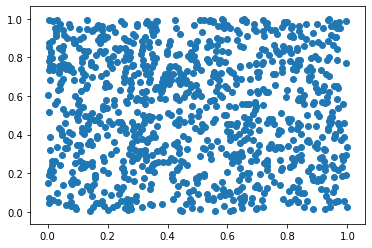

In [84]:
plt.scatter(A[:,0],A[:,1])
plt.scatter()
plt.show()

array([[ 1.67681433e-01],
       [ 1.93861324e-01],
       [ 1.64426571e-02],
       [ 9.06797762e-02],
       [ 1.60169376e-01],
       [ 2.69168530e-02],
       [ 8.23048685e-02],
       [ 1.16238717e-01],
       [ 1.06147096e-01],
       [ 1.57865755e-01],
       [ 9.65240206e-02],
       [ 1.00505736e-01],
       [ 1.76958392e-01],
       [ 1.41508475e-01],
       [ 2.71850655e-01],
       [ 2.54860856e-01],
       [ 1.13756470e-01],
       [ 1.28823398e-02],
       [ 9.82254331e-02],
       [ 1.10718066e-01],
       [ 3.79326879e-02],
       [ 1.44950979e-01],
       [ 1.49553198e-01],
       [ 1.12919799e-03],
       [ 2.05587066e-01],
       [ 2.72100167e-01],
       [ 1.45747805e-01],
       [ 2.73291839e-01],
       [ 1.50073048e-01],
       [ 2.53657015e-01],
       [ 2.80704980e-01],
       [ 8.92807651e-02],
       [ 2.20447452e-01],
       [ 2.18520820e-01],
       [ 1.18360456e-01],
       [ 6.90224844e-03],
       [ 1.51581477e-01],
       [ 9.95054519e-02],
       [ 2.1